In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [47]:
import seaborn as sns

In [48]:
import matplotlib.animation as animation

We aim to solve the diffusion equation using the finite difference explicit method. To be more specific, let's solve in polar coordinates:

\begin{equation}
\frac{\partial f}{\partial t} + r\frac{\partial f}{\partial \theta} = \kappa \Delta f
\end{equation}
\begin{equation}
\text{ for } 0 < r < 10 \text{ and } 0 \leq \theta \leq 2\pi
\end{equation}

\begin{equation}
\frac{\partial f}{\partial t} + r\frac{\partial f}{\partial \theta} = \kappa\left(\frac{\partial^2f}{\partial r^2} + \frac{1}{r}\frac{\partial f}{\partial r} + \frac{1}{r^2}\frac{\partial ^2f}{\partial \theta^2} \right)
\end{equation}

Subject to the following conditions:
\begin{gather}
f(0, r, \theta) = \begin{cases} 1 & r = 8, \theta = 0 \\ 0 & \text{otherwise}\end{cases} \\
f(t, r, 0) = f(t, r, 2\pi)
\end{gather}

In [45]:
k = 0.19

## Step 1: Create Grid Points

In [3]:
# How many columns do we need? (including phantom rows)
nx = 100 + 1

# Distance between columns
dx = (2*np.pi - 0)/(nx - 1)

# th_Positions
x_grid = np.arange(0, 2*np.pi+dx, dx)

In [4]:
# How many rows do we need? (including phantom rows)
ny = 100 + 1

# Distance between rows
dy = (2*np.pi - 0)/(ny - 1)

# y_Positions
y_grid = np.arange(0, 2*np.pi+dy, dy)

In [33]:
# How many layers do we need?
nt = 101

# Distance between layers
dt = (2-0)/(nt-1)

# t_Positions
t_grid = np.linspace(0, 1, nt)

Check the Courant Condition

In [46]:
Courant = (k * dt)/(dx**2)
print(Courant)

0.9625512446022088


## Step 2: Condition

In [15]:
# create matrices of values ([row, column, layer])
fval = np.zeros([len(x_grid), len(y_grid), len(t_grid)])

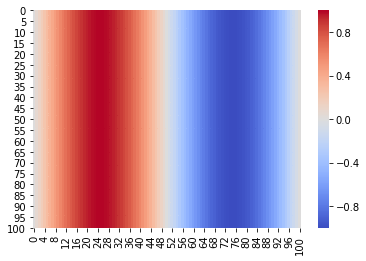

In [16]:
# Inital Condition - f(x = column, y = row, t) = sin(x)
for i in range(0, ny):
    fval[i, :, 0] = np.sin(x_grid)
sns.heatmap(fval[:,:,0],cmap="coolwarm")

## Step 3: Loop

In [30]:
# [j='row index' = r, i = 'column index' = theta, time]
for n in range(0, nt-1): #t
    for j in range(0, nx-1): #y
        y = np.sin(y_grid[j])
        a = (dt*k)/(dx**2) - (dt*y)/(dx)
        b = (-2*dt*k)/(dx**2) - (2*dt*k)/(dy**2) + 1
        c = (dt*k)/(dx**2) + (dt*y)/(dx)
        d = (dt*k)/(dy**2)
        for i in range(0, nx-1): #x
            fval[j, i, n+1] = a*fval[j, i+1, n] + b*fval[j, i, n] + c*fval[j, i-1, n] + d*(fval[j+1, i, n] + fval[j-1, i, n])

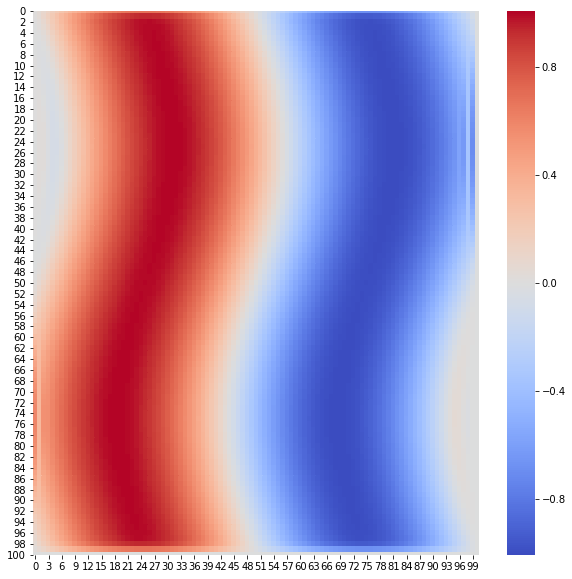

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(fval[:,:,10],cmap="coolwarm")

Animation

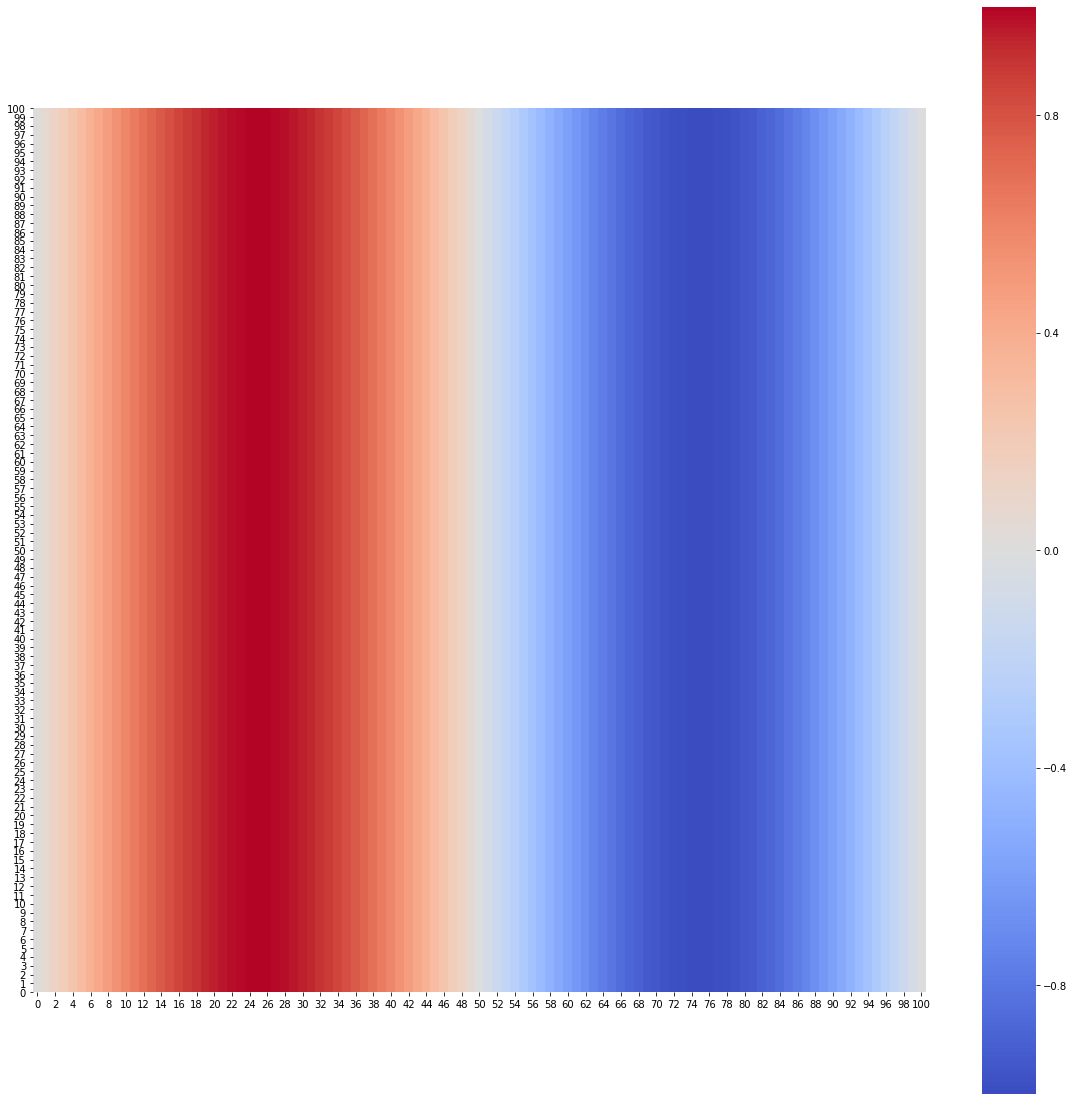

In [66]:
fig,ax = plt.subplots(figsize = (20,20))
def init():
    plt.clf()
    ax = sns.heatmap(fval[:,:,0], cmap="coolwarm", square = True)
    ax.invert_yaxis()

def animate(n):
    plt.clf()
    ax = sns.heatmap(fval[:,:,n], cmap="coolwarm", square = True)
    ax.invert_yaxis()

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval = 50, repeat = True)
# anim.save('diffusion1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])